# Simple Linear Regression: Carbon Dioxide Emission

In [2]:
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd
import pylab as pl
%matplotlib inline

### Download and view data

In [12]:
# If you don't have wget installed for downloading the data

# !pip install wget

In [11]:
# Download the data
import wget
# Source for csv file download
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv"
wget.download(url, "FuelConsumption.csv") # csv file downloaded to cwd

100% [..............................................................................] 72629 / 72629

'FuelConsumption.csv'

In [13]:
fuelcon = pd.read_csv("FuelConsumption.csv")
type(fuelcon)

pandas.core.frame.DataFrame

In [14]:
# Take a look at the data
fuelcon.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [16]:
# All the features of the dataset
fuelcon.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [19]:
# Great values for various statistical measures
fuelcon.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Some Visualizations

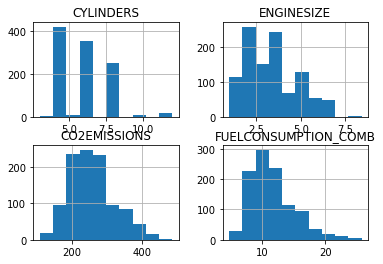

In [28]:
# Form a smaller set from the bigger dataset
viz = fuelcon[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

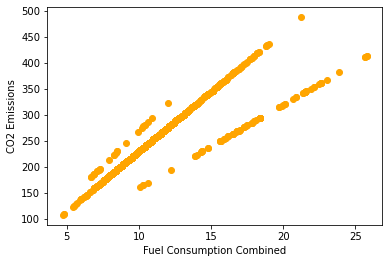

In [48]:
plt.scatter(fuelcon["FUELCONSUMPTION_COMB"], fuelcon["CO2EMISSIONS"], color="orange")
plt.xlabel("Fuel Consumption Combined")
plt.ylabel("CO2 Emissions")
plt.show()

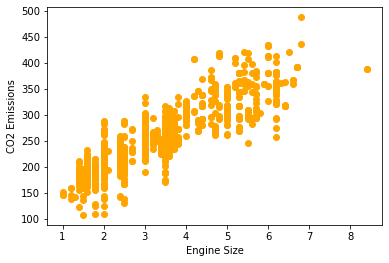

In [49]:
plt.scatter(fuelcon["ENGINESIZE"], fuelcon["CO2EMISSIONS"], color="orange")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

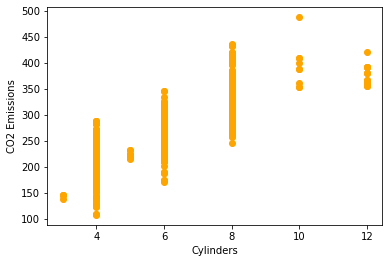

In [50]:
plt.scatter(fuelcon["CYLINDERS"], fuelcon["CO2EMISSIONS"], color="orange")
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions")
plt.show()

### Split to train and test datasets: Using Scikit Learn inbuilt function

In [37]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(fuelcon, test_size=0.2, random_state=42)

In [45]:
print("Number of training examples: ",len(train),"\n")
train.head()

Number of training examples:  853 



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
333,2014,FIAT,500 ABARTH HATCHBACK,MINICOMPACT,1.4,4,M5,X,8.5,6.9,7.8,36,179
106,2014,BMW,650i xDRIVE CABRIOLET,SUBCOMPACT,4.4,8,A8,Z,15.0,9.8,12.7,22,292
585,2014,JEEP,GRAND CHEROKEE 4X4 DIESEL,SUV - STANDARD,3.0,6,A8,D,11.2,8.4,9.9,29,267
55,2014,AUDI,S4,COMPACT,3.0,6,A7,Z,13.2,9.2,11.4,25,262
213,2014,CHEVROLET,EXPRESS 1500 CARGO AWD,VAN - CARGO,5.3,8,A4,X,18.3,14.2,16.5,17,380


In [47]:
print("Number of test set examples: ",len(test),"\n")
test.head()

Number of test set examples:  214 



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
732,2014,MERCEDES-BENZ,CL 550 4MATIC,COMPACT,4.7,8,AS7,Z,15.4,10.4,13.2,21,304
657,2014,LEXUS,ES 350,MID-SIZE,3.5,6,AS6,X,11.3,7.6,9.6,29,221
168,2014,CADILLAC,CTS SEDAN Vsport,MID-SIZE,3.6,6,AS8,Z,15.1,9.9,12.8,22,294
86,2014,BMW,335i,COMPACT,3.0,6,A8,Z,11.4,7.3,9.6,29,221
411,2014,FORD,FUSION,MID-SIZE,2.0,4,AS6,X,10.5,7.1,9.0,31,207


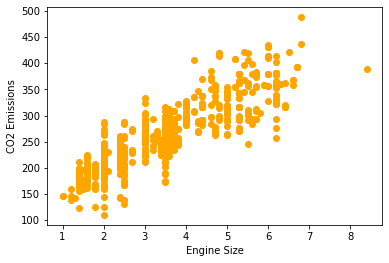

In [52]:
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color="orange")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

In [60]:
type(train[["ENGINESIZE"]])

pandas.core.frame.DataFrame

### Modelling: Linear Regression Model

In [61]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

regr.fit(train_x, train_y)

LinearRegression()

In [63]:
print("Slope: ", regr.coef_)
print("Intercept: ", regr.intercept_)
type(regr.coef_)

Slope:  [[38.99297872]]
Intercept:  [126.28970217]


numpy.ndarray

### Plot the line over the data

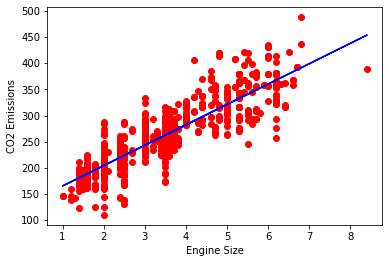

In [84]:
slope = regr.coef_[0][0]
intercept = regr.intercept_[0]

plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color="red")
# The plot for the line (-b: means blue line)
plt.plot(train_x, slope*train_x+intercept, "-b")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

### Predict some values using the model

In [103]:
# Some values in form of array

arr = np.array([[1.4],[4.7]])
regr.predict(arr)

array([[180.87987239],
       [309.55670218]])

### Evaluate the model

In [92]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_labels = np.asanyarray(test[["CO2EMISSIONS"]])
test_preds = regr.predict(test_x)
print("Mean Squared Error: ", mean_squared_error(test_labels, test_preds))
# R2 score is kind of accuracy
print("R-2 score: %.2f" %(r2_score(test_labels, test_preds)*100))

Mean Squared Error:  985.9381692274995
R-2 score: 76.16
